# 3章

In [2]:
!pip install japanize_matplotlib
!git clone https://github.com:submergedcube/non-semipara.git

  Using cached japanize-matplotlib-1.1.3.tar.gz (4.1 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=715532288721dddf8833722dcf54259cfa4779a968e3ad925b79ffb50e280f12
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib
Cloning into 'non-semipara'...
fatal: unable to access 'https://github.com:submergedcube/non-semipara.git/': URL using bad/illegal format or missing URL


In [ ]:
%reload_ext autoreload
%autoreload 2

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as stats


from modules.nonparametric_modules import (
    TriangularKernel,
    RectangularKernel,
    EpanechnikovKernel,
    BiweightKernel,
    GaussianKernel,
    nadaraya_watson_estimator,
    local_polinomial_estimator,
    calculate_optimal_bandwidth,
    calculate_optimal_K,
    convert_for_series_method_data
)


### データの準備

対象は個人的に作成したある車の中古車価格データ。  
1車種分のデータで価格、年数、修理歴、走行距離、ハイブリッドの有無、4輪駆動の有無、グレードで構成されている。

In [ ]:
df = pd.read_csv('./car_price_data1.csv')
df = df.iloc[:, 1:]

### カーネルの確認

カーネルの形状を確認します。

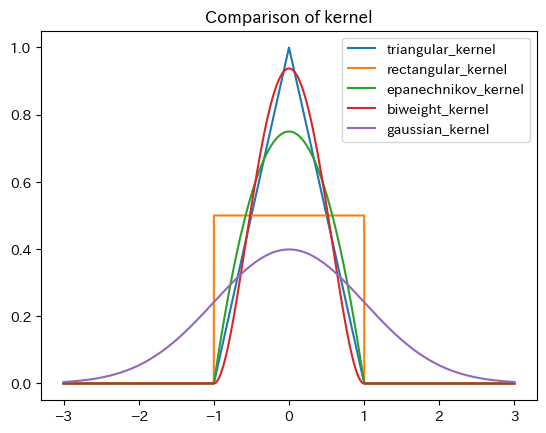

In [ ]:
tmp_x = np.array(range(-6000, 6000, 1))/2000
tk = TriangularKernel()
rk = RectangularKernel()
ek = EpanechnikovKernel()
bk = BiweightKernel()
gk = GaussianKernel()

plt.plot(tmp_x, [tk(i)
                 for i in tmp_x], linewidth=1.5, label='triangular_kernel')
plt.plot(tmp_x, [rk(i)
                 for i in tmp_x], linewidth=1.5, label='rectangular_kernel')
plt.plot(tmp_x, [ek(i)
                 for i in tmp_x], linewidth=1.5, label='epanechnikov_kernel')
plt.plot(tmp_x, [bk(i)
                 for i in tmp_x], linewidth=1.5, label='biweight_kernel')
plt.plot(tmp_x, [gk(i)
                 for i in tmp_x], linewidth=1.5, label='gaussian_kernel')

plt.legend()
plt.title('Comparison of kernel')
plt.show()

### Nadaraya-Watson回帰

特定のグレードに一変数でのNadaraya-Watson回帰を行う。  
今回は走行距離で価格を回帰する。  

バンド幅を変えてみたり、カーネルを変えてみたりして結果を比較する。  
バンド幅の変化の影響は大きいが、カーネルを変えてもあまり予測値は変わらない。  
教科書通りの結果である。



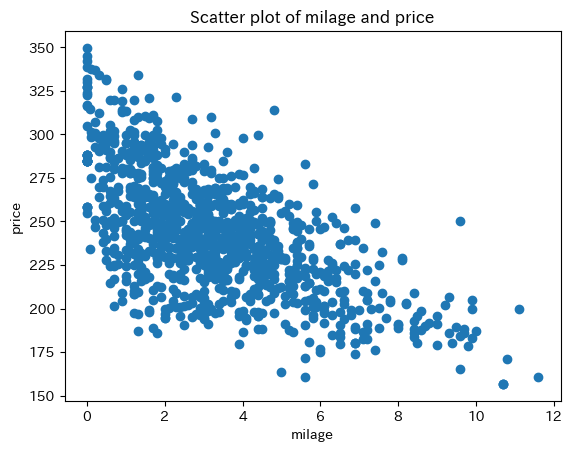

In [ ]:
plt.scatter(df.loc[df['W'] == 1]['mil'],df.loc[df['W'] == 1]['price'])
plt.xlabel('milage')
plt.ylabel('price')
plt.title('Scatter plot of milage and price')
plt.show()

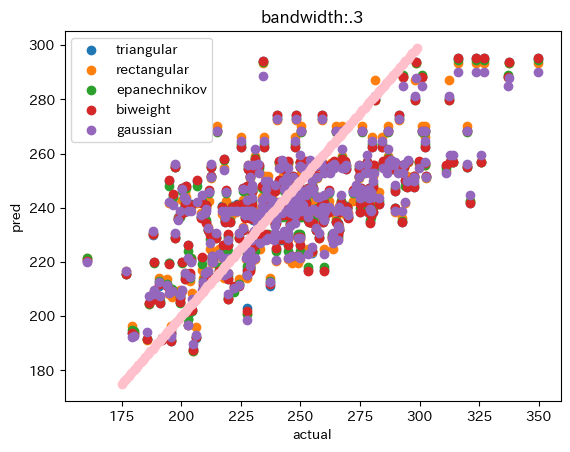

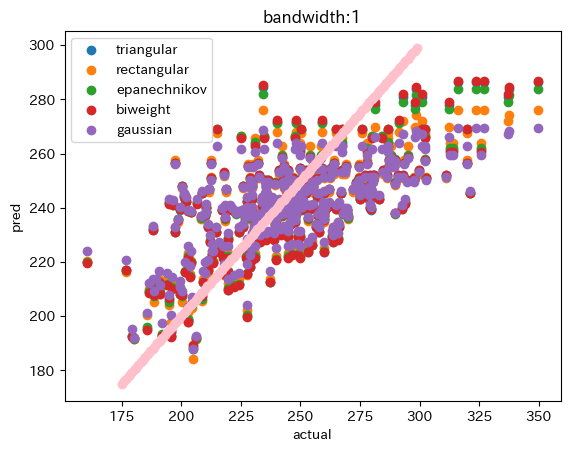

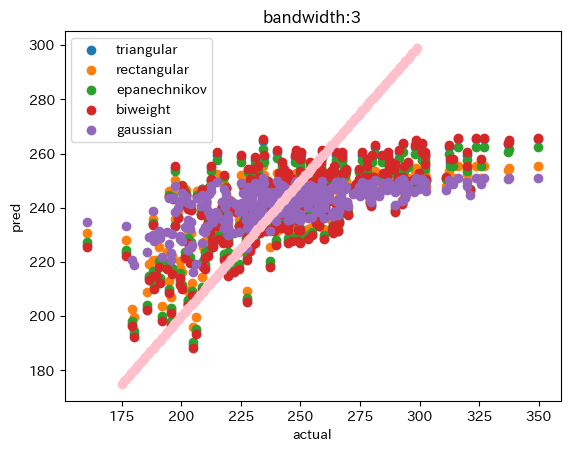

In [ ]:
df_X_train = df.iloc[:1000, :].loc[df['W'] == 1]['mil'].to_numpy()
df_y_train = df.iloc[:1000, :].loc[df['W'] == 1]['price'].to_numpy()
df_X_test = df.iloc[1000:, :].loc[df['W'] == 1]['mil'].to_numpy()
df_y_test = df.iloc[1000:, :].loc[df['W'] == 1]['price'].to_numpy()


preds_band_dot3 = [[],
                   [],
                   [],
                   [],
                   []]
preds_band1 = [[],
               [],
               [],
               [],
               []]
preds_band3 = [[],
               [],
               [],
               [],
               []]

kernels = [
    tk,
    rk,
    ek,
    bk,
    gk
]
for i in range(df_X_test.shape[0]):
    for j in range(5):
        preds_band_dot3[j].append(
            nadaraya_watson_estimator(df_X_train,
                                      df_y_train,
                                      kernels[j],
                                      df_X_test[i],
                                      .3)
        )
        preds_band1[j].append(
            nadaraya_watson_estimator(df_X_train,
                                      df_y_train,
                                      kernels[j],
                                      df_X_test[i],
                                      1)
        )
        preds_band3[j].append(
            nadaraya_watson_estimator(df_X_train,
                                      df_y_train,
                                      kernels[j],
                                      df_X_test[i],
                                      3)
        )

plt.scatter(df_y_test, preds_band_dot3[0],  label='triangular')
plt.scatter(df_y_test, preds_band_dot3[1],  label='rectangular')
plt.scatter(df_y_test, preds_band_dot3[2],  label="epanechnikov")
plt.scatter(df_y_test, preds_band_dot3[3],  label='biweight')
plt.scatter(df_y_test, preds_band_dot3[4],  label='gaussian')

plt.scatter(range(175, 300, 1), range(175, 300, 1),  c='pink')
plt.xlabel('actual')
plt.ylabel('pred')
plt.legend()
plt.title('bandwidth:.3')
plt.show()

plt.scatter(df_y_test, preds_band1[0],  label='triangular')
plt.scatter(df_y_test, preds_band1[1],  label='rectangular')
plt.scatter(df_y_test, preds_band1[2],  label="epanechnikov")
plt.scatter(df_y_test, preds_band1[3],  label='biweight')
plt.scatter(df_y_test, preds_band1[4],  label='gaussian')

plt.scatter(range(175, 300, 1), range(175, 300, 1),  c='pink')
plt.xlabel('actual')
plt.ylabel('pred')
plt.legend()
plt.title('bandwidth:1')
plt.show()

plt.scatter(df_y_test, preds_band3[0],  label='triangular')
plt.scatter(df_y_test, preds_band3[1],  label='rectangular')
plt.scatter(df_y_test, preds_band3[2],  label="epanechnikov")
plt.scatter(df_y_test, preds_band3[3],  label='biweight')
plt.scatter(df_y_test, preds_band3[4],  label='gaussian')

plt.scatter(range(175, 300, 1), range(175, 300, 1),  c='pink')
plt.xlabel('actual')
plt.ylabel('pred')
plt.legend()
plt.title('bandwidth:3')
plt.show()

### Local-Polinomial推定量
Nadaraya-Watsonを拡張したLocal-Polinomial推定量を実装し、NW推定量との比較を行う。  
今回は特に理由はないが2次の局所多項式推定量にした。

おおむね同じような推定結果ではあるが、二次多項式で推定しているため、同じバンド幅でも変動が大きい。


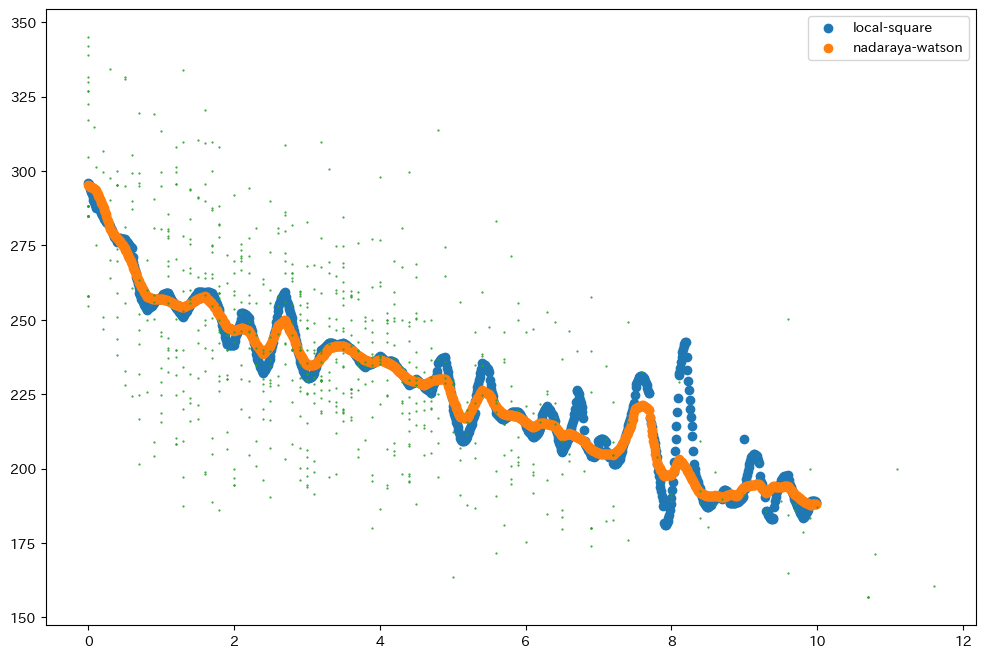

In [ ]:
demo_x = np.array(list(range(0, 1000, 1)))/100
nwy = []
y = []
band_width = 0.3
for x in demo_x:
    y.append(local_polinomial_estimator(df_X_train,
                                        df_y_train,
                                        kernels[0],
                                        x,
                                        band_width,
                                        2
                                        ))
    nwy.append(nadaraya_watson_estimator(
        df_X_train,
        df_y_train,
        kernels[0],
        x,
        band_width
    ))

plt.figure(figsize=(12, 8))
plt.scatter(demo_x, [i[0][0] for i in y], label='local-square')
plt.scatter(demo_x, nwy, label='nadaraya-watson')
plt.scatter(df_X_train, df_y_train, s=.3)
plt.legend()

### 最適バンド幅計算

p.53のプラグイン法に基づき最適バンド幅を計算する。  
本来このようにグリッド法を行う必要はないが、可視化のために以下のコードのように行う。  
また、見つかったバンド幅を使った場合の予測と適当に決めたバンド幅での予測を比較する。  
適当に決めたバンド幅でNW、LP双方で発生していた変動が最適なバンド幅だと抑えられていることがわかる。  

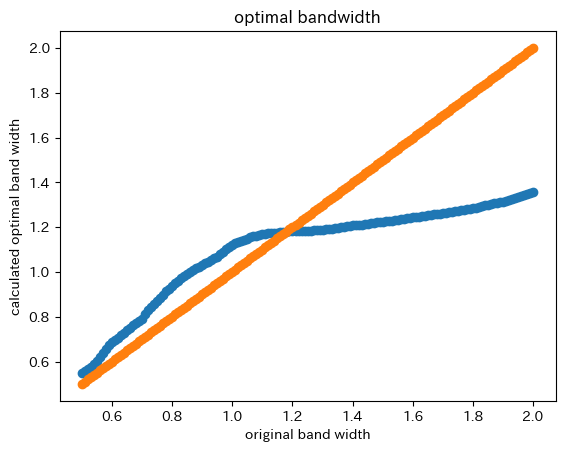

In [ ]:
import warnings

# すべての `RuntimeWarning` を無視
warnings.filterwarnings("ignore", category=RuntimeWarning)

trial_bands = np.array(list(range(50, 201, 1)))/100
h_opts = []
for band in trial_bands:
    h_opts.append(calculate_optimal_bandwidth(df_X_train,
                                              df_y_train,
                                              band,
                                              tk))
h_opt = trial_bands[np.argmin(np.abs(np.array(h_opts)-trial_bands))]

plt.scatter(trial_bands, h_opts)
plt.scatter(trial_bands, trial_bands)
plt.ylabel('calculated optimal band width')
plt.xlabel('original band width')
plt.title('optimal bandwidth')
plt.show()

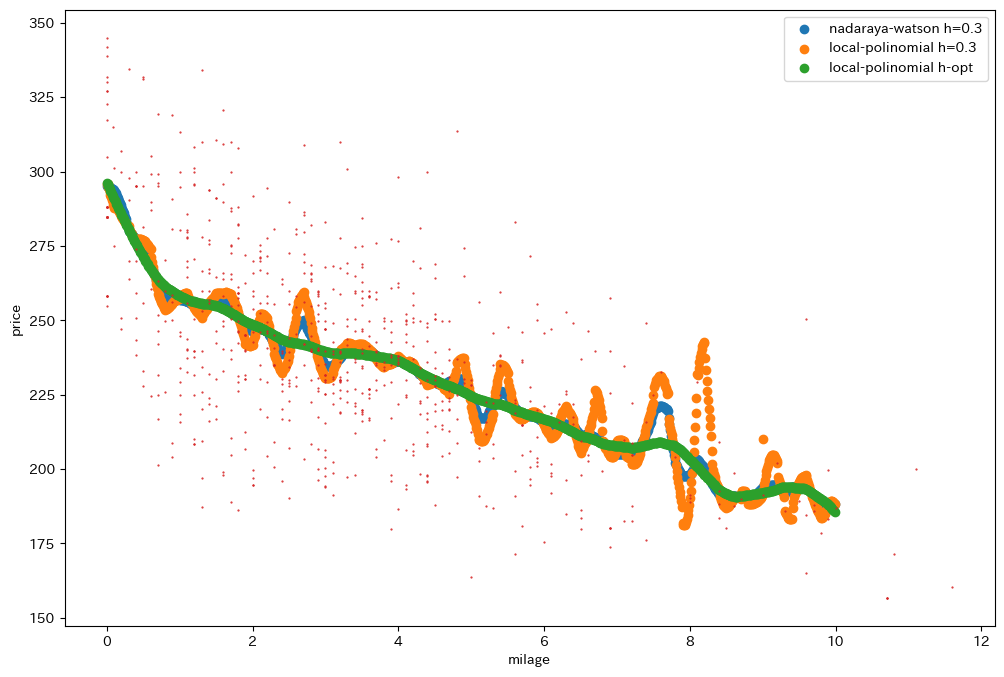

In [ ]:
demo_x = np.array(range(0, 1000, 1))/100
y_opt = []
y = []
band_width = 0.3
for x in demo_x:
    y.append(local_polinomial_estimator(df_X_train,
                                        df_y_train,
                                        tk,
                                        x,
                                        band_width,
                                        2
                                        ))
    y_opt.append(local_polinomial_estimator(df_X_train,
                                            df_y_train,
                                            kernels[0],
                                            x,
                                            h_opt,
                                            2
                                            ))

plt.figure(figsize=(12, 8))
plt.scatter(demo_x, nwy, label='nadaraya-watson h=0.3')
plt.scatter(demo_x, [i[0] for i in y], label='local-polinomial h=0.3')
plt.scatter(demo_x, [i[0] for i in y_opt], label='local-polinomial h-opt')
plt.scatter(df_X_train, df_y_train, s=.3)
plt.xlabel('milage')
plt.ylabel('price')
plt.legend()
plt.show()

### 人工データでの実験

上と同じことを人工データでも実験してみる。

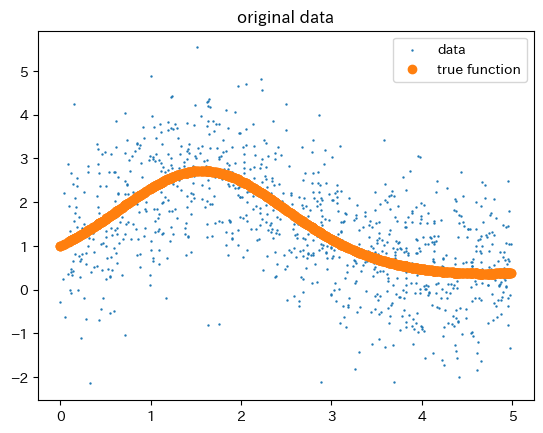

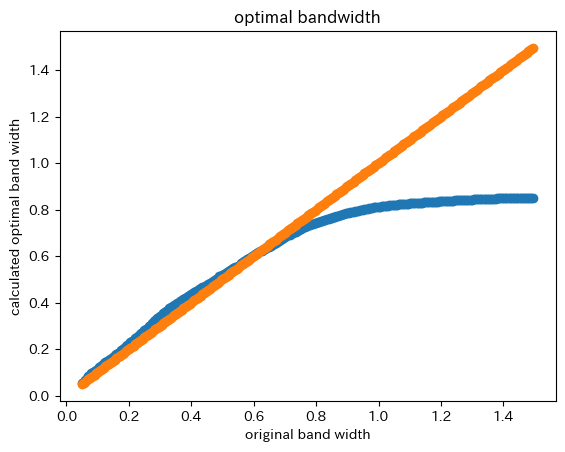

In [ ]:
size = 1000
x_dum = np.array(range(0, 500))/100
x_dum = np.array(random.choices(x_dum, k=size))
y_dum = np.array([np.exp(-i+np.sin(i)+i) for i in x_dum])
error = stats.norm.rvs(size=size)
y_dum = y_dum+error
plt.scatter(x_dum, y_dum, s=.5, label='data')
plt.scatter(x_dum, np.array([np.exp(-i+np.sin(i)+i)
            for i in x_dum]), label='true function')
plt.title('original data')
plt.legend()
plt.show()

trial_bands = np.array(list(range(10, 300, 1)))/200
h_opts = []
for band in trial_bands:
    h_opts.append(calculate_optimal_bandwidth(x_dum,
                                              y_dum,
                                              band,
                                              tk))

plt.scatter(trial_bands, h_opts)
plt.scatter(trial_bands, trial_bands)
plt.ylabel('calculated optimal band width')
plt.xlabel('original band width')
plt.title('optimal bandwidth')
plt.show()

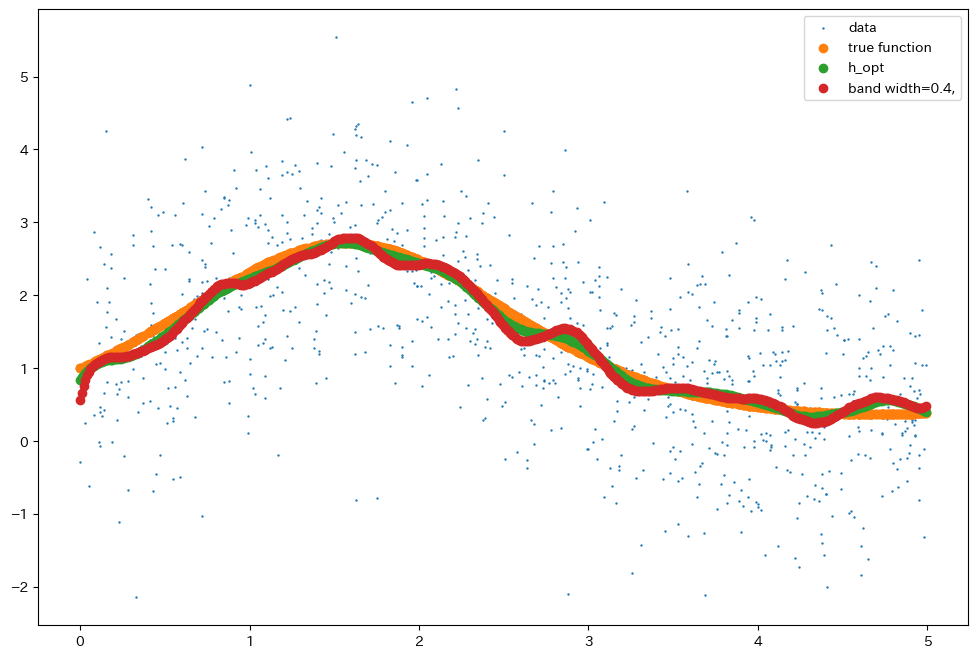

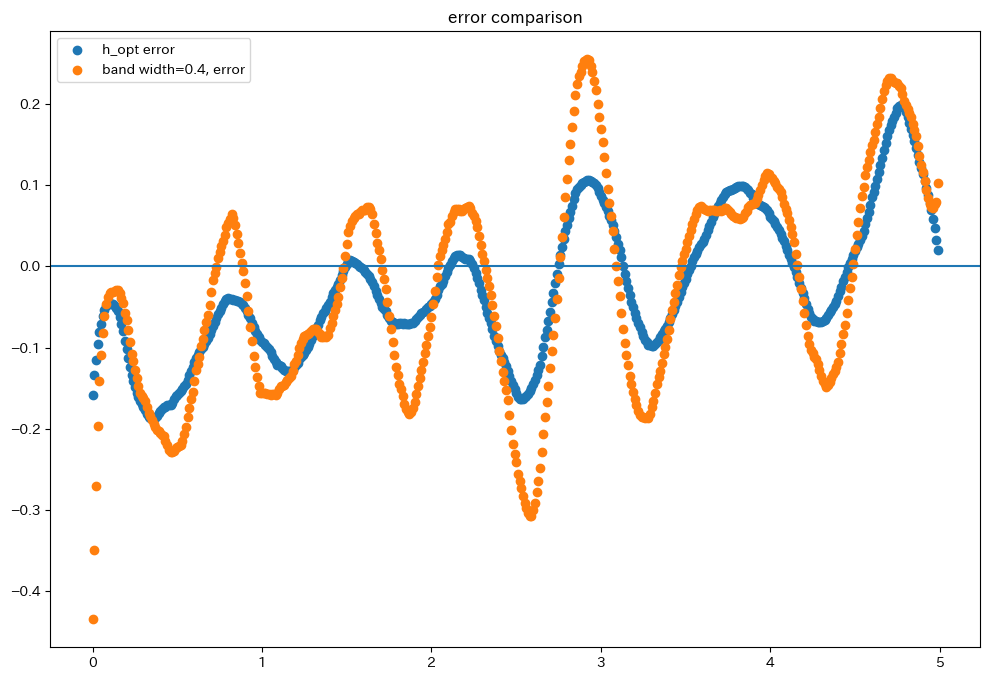

In [ ]:
h_opt = trial_bands[np.argmin(np.abs(trial_bands - h_opts))]
prediction_h1 = []
prediction_h_opt = []
dummy_band_width = .4
for x in np.array(range(0, 500))/100:
    prediction_h_opt.append(local_polinomial_estimator(x_dum,
                                                       y_dum,
                                                       tk,
                                                       x,
                                                       h_opt,
                                                       2
                                                       )[0])
    prediction_h1.append(local_polinomial_estimator(x_dum,
                                                    y_dum,
                                                    tk,
                                                    x,
                                                    dummy_band_width,
                                                    2
                                                    )[0])
plt.figure(figsize=(12, 8))
plt.scatter(x_dum, y_dum, s=.5, label='data')
plt.scatter(x_dum, np.array([np.exp(-i+np.sin(i)+i)
            for i in x_dum]), label='true function')
plt.scatter(np.array(range(0, 500))/100,
            prediction_h_opt,
            label='h_opt')
plt.scatter(np.array(range(0, 500))/100,
            prediction_h1,
            label=f'band width={dummy_band_width},')
plt.legend()
plt.show()


plt.figure(figsize=(12, 8))
plt.scatter(np.array(range(0, 500))/100,
            np.array(prediction_h_opt).T -
            np.array([np.exp(-i+np.sin(i)+i)
                     for i in np.array(range(0, 500))/100]),
            label='h_opt error'
            )
plt.scatter(np.array(range(0, 500))/100,
            np.array(prediction_h1).T-np.array([np.exp(-i+np.sin(i)+i)
                                                for i in np.array(range(0, 500))/100]),
            label=f'band width={dummy_band_width}, error'
            )
plt.axhline(y=0)
plt.title('error comparison')
plt.legend()
plt.show()

### シリーズ推定法回帰

人工データに対しシリーズ推定を行う。    
基底関数はスプライン関数を使い、シリーズ長Kはデフォルトで10にした。  
単純な関数なため非常に良く推定できている。

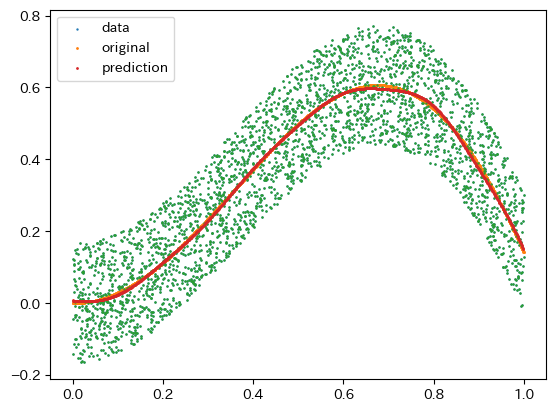

In [ ]:
s = np.array([random.random() for i in range(3000)])
data = np.array([i*np.sin(3*i) for i in s])
data = data+(np.array([random.random() for i in range(3000)])-.5)/3

plt.scatter(s, data, label='data',s=.5)
plt.scatter(s, np.array([i*np.sin(3*i) for i in s]), label='original',s=1)


q, knots = convert_for_series_method_data(s)
y = data.reshape(1, 3000).T
beta = np.linalg.inv(q@q.T)@q@y

# 可視化
test_x = np.array(range(1000))/1000
# データ
plt.scatter(s, data, s=.5)
converted_test_x, _ = convert_for_series_method_data(
    test_x, knots=knots)
prediction = converted_test_x.T@beta
# 予測値
plt.scatter(test_x, prediction.T[0], label='prediction',s=1)
plt.legend()
plt.show()

### 最適なシリーズ長Kの算出
教科書通り一個抜き交差検証で0~50の中で最適なKを探索する。  
単純すぎる例のため、違いはほぼわからない。

The best K is 3.


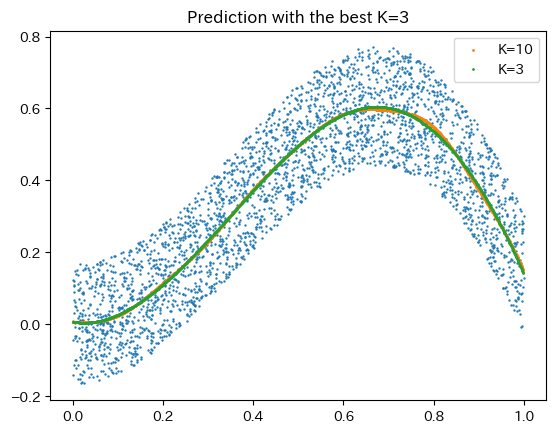

In [ ]:
best_k = calculate_optimal_K(s, y)
print(f'The best K is {best_k}.')

q, knots = convert_for_series_method_data(s, K=best_k)
beta = np.linalg.inv(q@q.T)@q@y

# 以下は可視化
test_x = np.array(list(range(1000)))/1000
# データ
plt.scatter(s, data, s=.5)
converted_test_x, _ = convert_for_series_method_data(
    test_x, knots=knots, K=best_k)

plt.scatter(test_x, prediction.T[0], label='K=10',s=1)

prediction = converted_test_x.T@beta
# 予測値
plt.scatter(test_x, prediction.T[0],label=f'K={best_k}',s=1)
plt.legend()
plt.title(f'Prediction with the best K={best_k}')
plt.show()

### 回帰不連続デザイン

回帰不連続デザインに基づく平均処置効果(ATT)を推定する。  

対象データ:ある車種の中古車価格。  
2020年にモデルチェンジを行っており、モデルチェンジ前後ともにほぼ1グレード。  
そのため通常の識別可能性の仮定を満たさない。


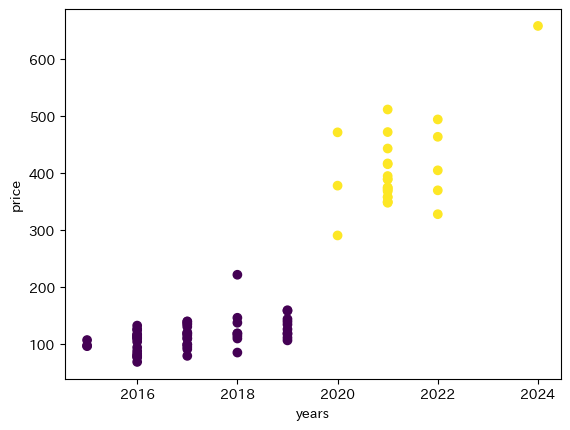

In [ ]:
df = pd.read_csv('car_price_data2.csv')

plt.scatter(df['years'], df['price'], c=df['Z'])
plt.xlabel('years')
plt.ylabel('price')
plt.show()

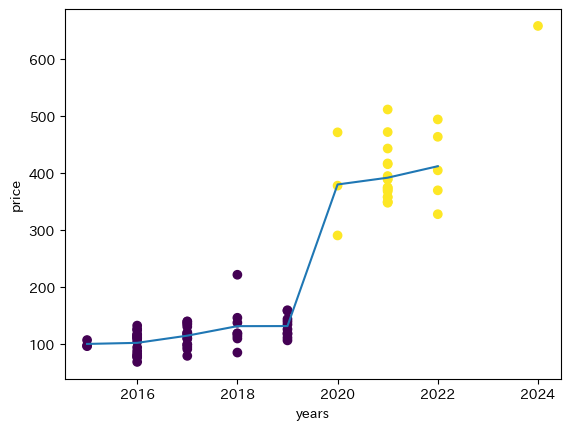

tau_rdd hat is 247.9
Bias and Variance of tau_rdd are Bias=5.568, Variance=14856.5


In [ ]:
# 全体で行った回帰。
prediction = []
for y in range(2015, 2023, 1):
    prediction.append(local_polinomial_estimator(df['years'].to_numpy(),
                                                 df['price'].to_numpy(),
                                                 kernels[0],
                                                 y,
                                                 2,
                                                 2
                                                 )[0])
plt.scatter(df['years'], df['price'], c=df['Z'])
plt.plot(list(range(2015, 2023, 1)), prediction)
plt.xlabel('years')
plt.ylabel('price')
plt.show()

# 以下ATEの計算
df_before = df[df['years'] < 2020]
df_after = df[df['years'] >= 2020]
band_width = 3
kernel = kernels[0]
n = len(df)
result_before_mc = local_polinomial_estimator(df_before['years'].to_numpy(),
                                              df_before['price'].to_numpy(),
                                              kernel,
                                              2019,
                                              band_width=band_width,
                                              q=2
                                              )
result_after_mc = local_polinomial_estimator(df_after['years'].to_numpy(),
                                             df_after['price'].to_numpy(),
                                             kernel,
                                             2020,
                                             band_width=band_width,
                                             q=2
                                             )

Bias = (band_width**2/2 *
        kernels[0].get_kappa_star()*(result_before_mc[2] - result_after_mc[2]))[0]
f_c_plus = df_after.groupby('years').count().loc[2020].iloc[0]/len(df_after)
f_c_minus = df_before.groupby('years').count().loc[2019].iloc[0]/len(df_before)
sigma2_c_plus = df_after.groupby('years').std().loc[2020].iloc[0]**2
sigma2_c_minus = df_before.groupby('years').std().loc[2019].iloc[0]**2

Variance = kernel.get_R_star()/n/band_width*(sigma2_c_plus /
                                             f_c_plus + sigma2_c_minus/f_c_minus)
print(f'tau_rdd hat is {(result_after_mc[0] - result_before_mc[0])[0]:.4}')
print(f'Bias and Variance of tau_rdd are {Bias=:.4}, {Variance=:.6}')